Naive Bayes, a classifier that’s based on probability and works incredibly well for tasks like text classification, such as spam detection.

### **Why is it Naive?**
It’s called “naive” because it assumes that all the features are independent of each other. In reality, words are often related (e.g., “free” and “prize” might often show up together in spam), but this “naive” assumption still works surprisingly well in practice! Bayes because it is a probabilistic classifier that uses Bayes’ Theorem.
### **How Does Naive Bayes Work?**
The algorithm calculates the probability that a given data point (like an email) belongs to a specific class (like spam or not spam). It does this by looking at the prior probability (how often each class occurs) and the likelihood of each feature (word) given the class.
Let’s say you’re trying to classify an email as spam or not spam based on the words it contains. It will look at all the emails you’ve already labeled as spam or not spam. Then it will calculate how often each word appears in each category. Then we use these prior probabilities to calculate whether the email is more likely to be spam or not.

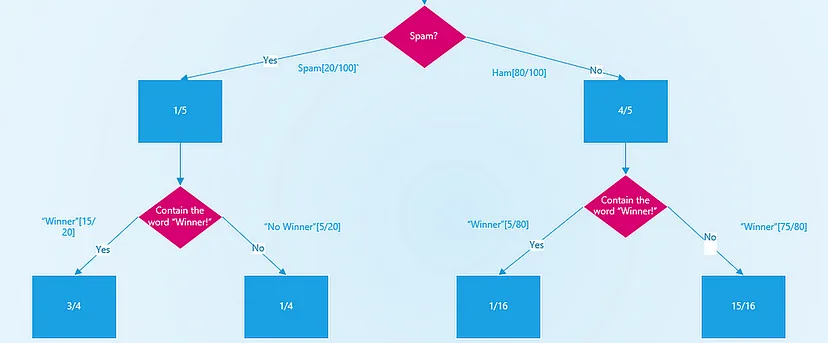

In [1]:
import numpy as np

class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)  #Mean of each feature for each class
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)   #Variance of each feature for each class
        self._priors = np.zeros(n_classes, dtype=np.float64)              #Probability of each class (𝑃(𝑦=𝑐))

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)

        # return class with highest posterior probability
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x): #Probability density function
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


In [2]:

# Testing
if __name__ == "__main__":
    # Imports
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    X, y = datasets.make_classification(
        n_samples=1000, n_features=10, n_classes=2, random_state=123
    )
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )

    nb = NaiveBayes()
    nb.fit(X_train, y_train)
    predictions = nb.predict(X_test)

    print("Naive Bayes classification accuracy", accuracy(y_test, predictions))

Naive Bayes classification accuracy 0.965
